In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv('diabetes.csv') #read_csv makes data frame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [179]:
df.isnull().sum()  ##check it cz then youll be doing operations which would cause an error

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
##outcome in terms of string for visualization so...
df['Outcome']=np.where(df['Outcome']==1,"diabetic","non-diabetic")

In [180]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


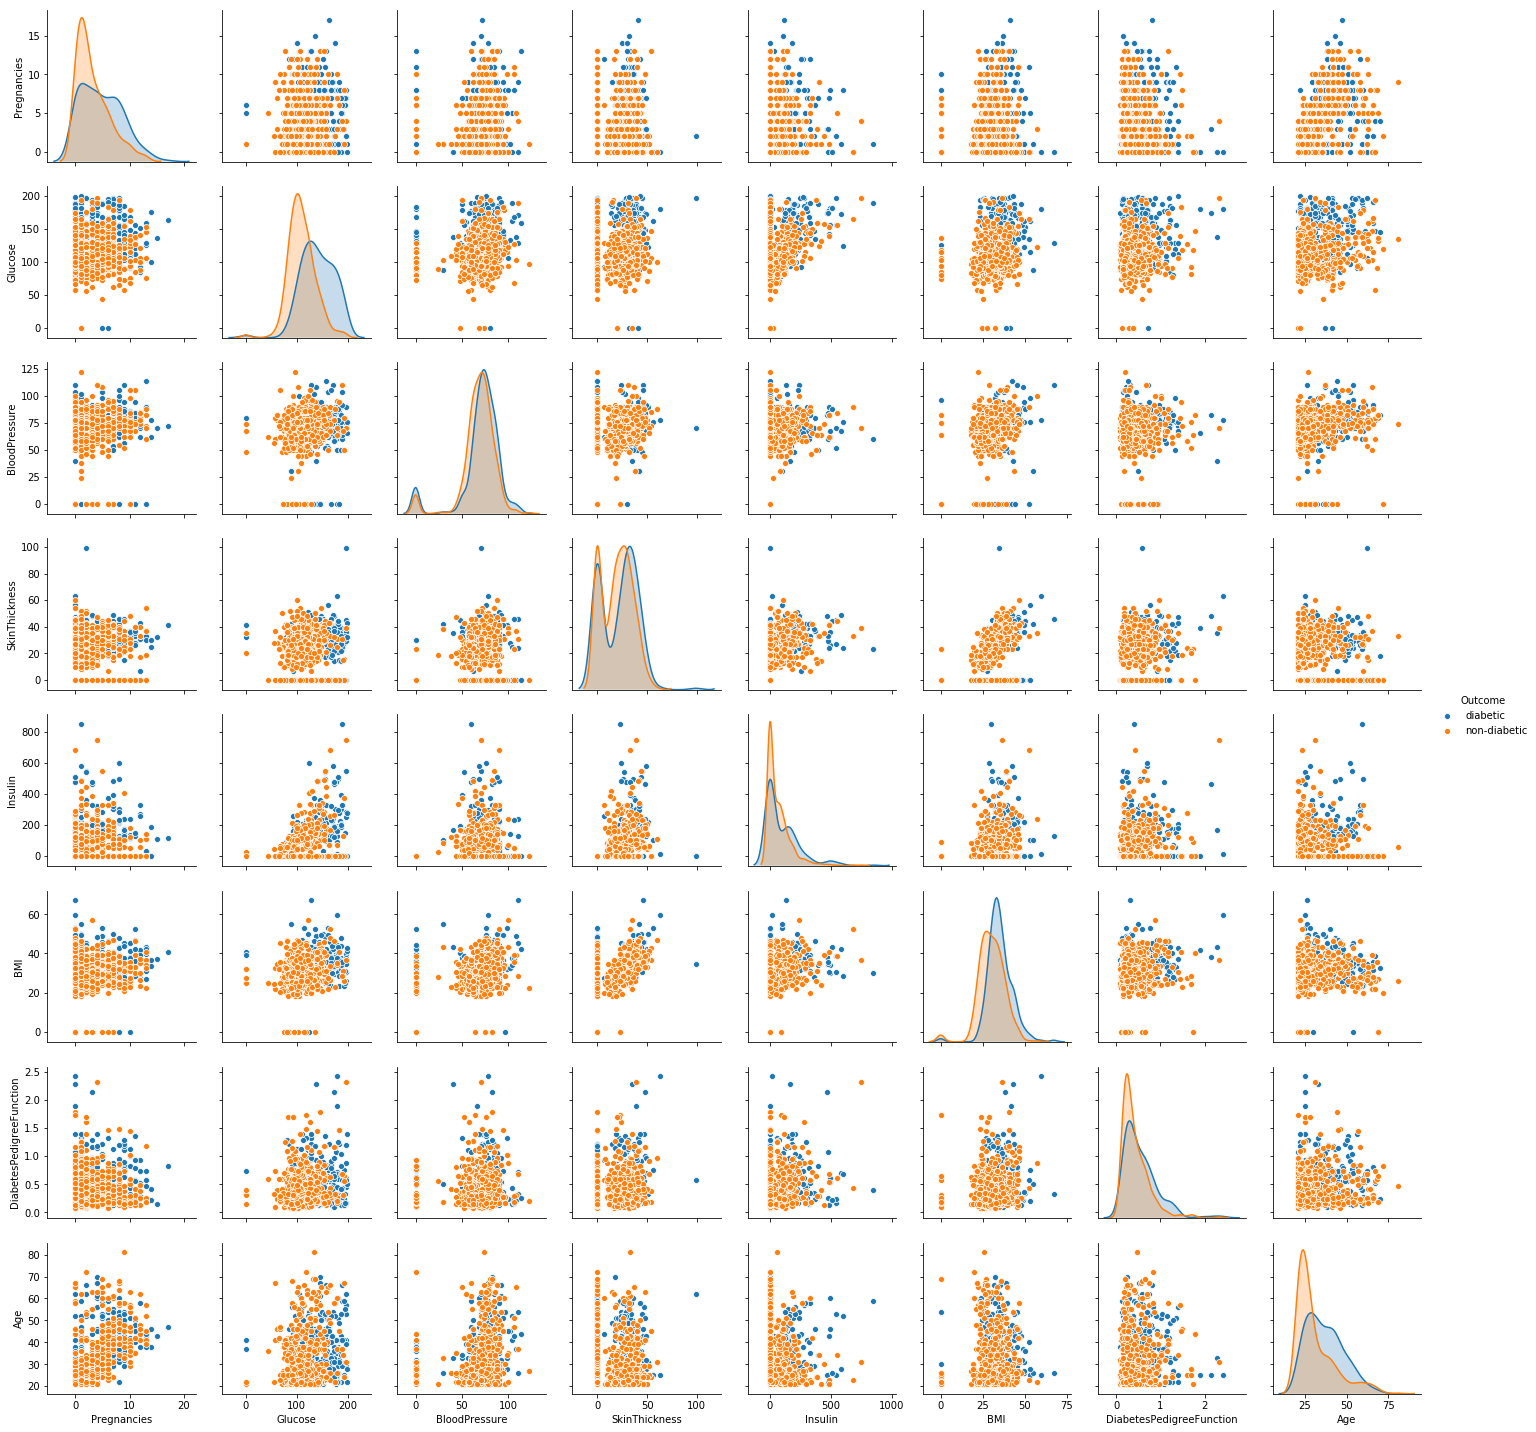

In [9]:
sns.pairplot(df,hue="Outcome")

In [6]:
# reset the values of y to 0 and 1, since they have been set to diabetic/non-diabetic
X=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

In [7]:
print(X.shape,y.shape)

(768, 8) (768,)


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
###libraries from Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [10]:
#Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)
print(X_test.size())

torch.Size([154, 8])


In [11]:
print(X_train.shape)

torch.Size([614, 8])


In [13]:
#use the NN module for it
#Input features are automatically set while initializing in the below cell
class ANN_classify(nn.Module):
    def __init__(self,input_features,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_con1=nn.Linear(input_features,hidden1)  #connect i/p to h1
        self.f_con2=nn.Linear(hidden1,hidden2)         #connect h1 to h2 
        self.out=nn.Linear(hidden2,out_features)             #connect h2 to o/p
    def forward(self,x):                                     
        x=F.relu(self.f_con1(x))                       #not actually the capital X but activation functions for nodes
        x=F.relu(self.f_con2(x))
        x=self.out(x)
        return x

In [14]:
#instantiating the class
torch.manual_seed(20)                                        #for initial weights
features=X_train.shape[1]
model=ANN_classify(input_features=features)

In [15]:
model.parameters ##calls the parameters fed

<bound method Module.parameters of ANN_classify(
  (f_con1): Linear(in_features=8, out_features=20, bias=True)
  (f_con2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [16]:
##Backward propogation----Define loss function, optimization algorithms
loss_function=nn.CrossEntropyLoss()                        # We use CrossEntropyLoss(Mostly a softmax function with negative log), NLLLoss was terrible and MSE didnt work altogether
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)          #Set learning rate 0.01 however I thought adam had adaptive learning rate

In [17]:
epochs=600        #training process
train_loses=[]
test_loses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    train_loses.append(loss)
    if i%10==1:
        print("Training iteration/epoc:{} and loss:{}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        model.eval()
        y_pred=model(X_test)
        loss=loss_function(y_pred,y_test)
        test_loses.append(loss)
        if i%10==1:
            print("Test iteration/epoc:{} and loss:{}".format(i,loss.item()))

Training iteration/epoc:1 and loss:3.457212209701538
Test iteration/epoc:1 and loss:1.6210612058639526
Training iteration/epoc:11 and loss:0.8019212484359741
Test iteration/epoc:11 and loss:0.8037418723106384
Training iteration/epoc:21 and loss:0.6090323328971863
Test iteration/epoc:21 and loss:0.6306867003440857
Training iteration/epoc:31 and loss:0.591776967048645
Test iteration/epoc:31 and loss:0.6008853912353516
Training iteration/epoc:41 and loss:0.5679706335067749
Test iteration/epoc:41 and loss:0.6040674448013306
Training iteration/epoc:51 and loss:0.5529038906097412
Test iteration/epoc:51 and loss:0.6079272031784058
Training iteration/epoc:61 and loss:0.5410096049308777
Test iteration/epoc:61 and loss:0.5972905158996582
Training iteration/epoc:71 and loss:0.5310391783714294
Test iteration/epoc:71 and loss:0.6050090193748474
Training iteration/epoc:81 and loss:0.522036075592041
Test iteration/epoc:81 and loss:0.5983459949493408
Training iteration/epoc:91 and loss:0.5135970115661

Text(0, 0.5, 'loss function')

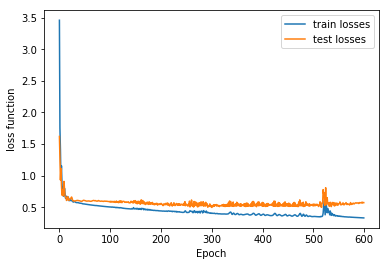

In [18]:
##plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),train_loses, label="train losses")
plt.plot(test_loses, label="test losses")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("loss function")

In [19]:
#Predictions in X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[92, 15],
       [16, 31]], dtype=int64)

In [21]:
torch.unique(y_test,return_counts=True)

(tensor([0, 1]), tensor([107,  47]))

Text(69.0, 0.5, 'Actual values')

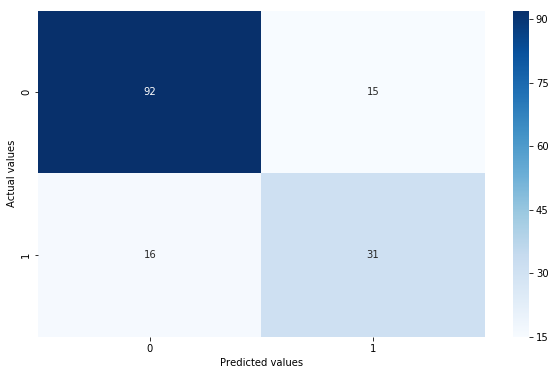

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,cmap='Blues',annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.67      0.66      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.80      0.80      0.80       154



In [33]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score

In [35]:
print("Accuracy",accuracy_score(y_test,predictions))
print("Precision",precision_score(y_test,predictions))
print("Recall",recall_score(y_test,predictions))
F1=fbeta_score(y_test,predictions,beta=1)
print('F1:',F1)

Accuracy 0.7987012987012987
Precision 0.6739130434782609
Recall 0.6595744680851063
F1: 0.6666666666666667


In [32]:
#formula to verify
Precision=31/(31+15)
Recall=31/(31+16)
print('Precision:',Precision,'\n','Recall:',Recall)
F1=((2*Precision*Recall)/(Precision+Recall))
print('F1:',F1)

Precision: 0.6739130434782609 
 Recall: 0.6595744680851063
F1: 0.6666666666666667
